In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import argparse
import os

def get_section_results(file):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == 'Eval_AverageReturn':
                Y.append(v.simple_value)
    return X, Y

%matplotlib inline

2022-11-01 19:38:53.287250: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Problem 2:

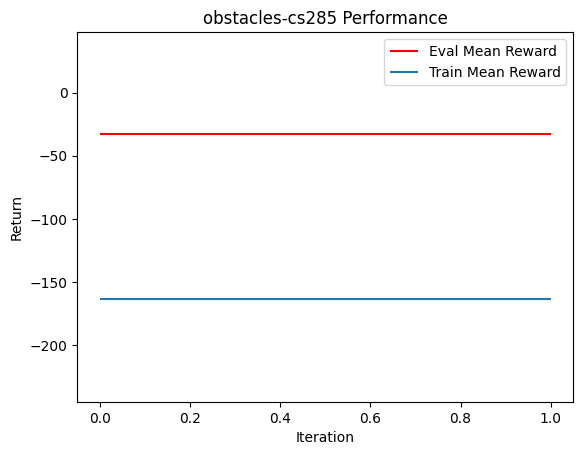

In [39]:
def gen_plot(file_prefix, best=False, splice=None, _DEBUG=False, _figure=None):
    file_prefix = f"hw4_{file_prefix}"
    files = glob.glob(f"../../data/{file_prefix}*")
    
    if _figure:
        if _figure[0]:
            plt.figure(figsize=_figure[0])
        else:
            plt.figure()
        plt.yticks(_figure[1])
    else:
        plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        arg = "Eval_AverageReturn"
        times, step_nums, vals = zip(*event_acc.Scalars(arg))
        i = file[file.index("q") + 1]
        lbl1 = file.split(f"q{i}_")[1]
        lbl2 = lbl1.split("-v")[0]
        lbl = lbl2
        if splice:
            lbl = lbl[:lbl.index(splice)]
        
        if best:
            label="Eval Mean Reward"
            plt.hlines(max(vals), 0, 1, label=label, color="red")
        else:
            plt.plot(step_nums, np.array(vals), label=lbl)
        
        if best:
            arg2 = "Train_AverageReturn"
            label="Train Mean Reward"
            times2, step_nums2, vals2 = zip(*event_acc.Scalars(arg2))
            plt.hlines(max(vals2), 0, 1, label=label)

        plt.legend()
        ttl1 = file.split("-v")[0][1:].split("_")[-1].split(".")[0]
        ttl1 = rename.get(ttl1, ttl1)
        ttl2 = lbl
        ttl2 = rename.get(ttl2, ttl2)
        # print(ttl1, ttl2)
        if ttl1 != ttl2: ttl1 += f" ({ttl2})"
        if '(' in ttl1:
            ttl1 = ttl1[:ttl1.index('(')-1]
    if best:
        plt.title(f"{ttl1} Performance")
    else:
        plt.title(ttl1)
    plt.xlabel('Iteration')
    plt.ylabel('Return')
    if best:
        mi, mx = min(vals[0], vals2[0]), max(vals[-1], vals2[-1])
        plt.ylim(mi - abs(mi) // 2, mx + abs(mi)//2)
    plt.show()

gen_plot("q2_obstacles_singleiteration_", best=True)

## Problem 3:

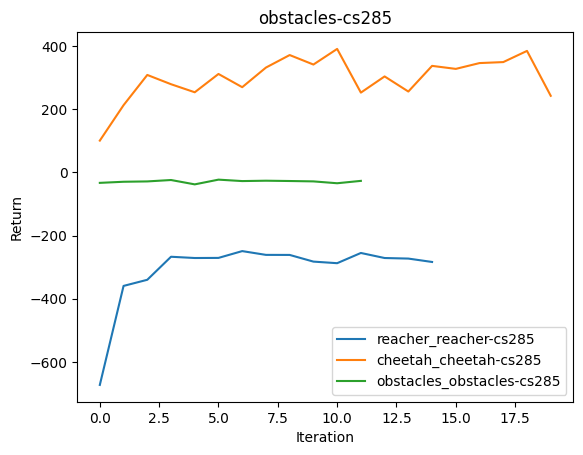

In [40]:
gen_plot("q3_")

## Problem 4:

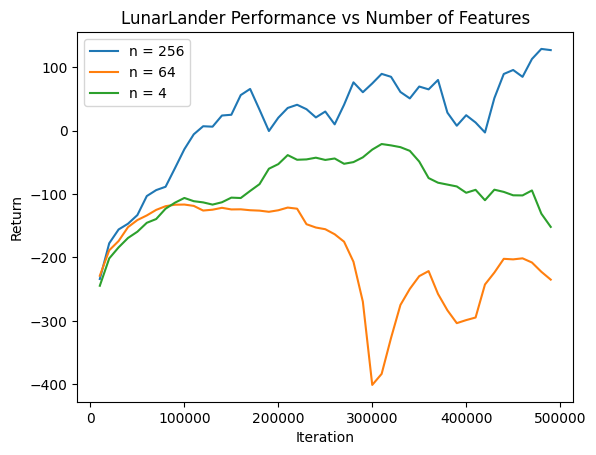

In [4]:
gen_plot("q3_", _figure=[(), np.arange(-2500, 501, 250)])

## Q4

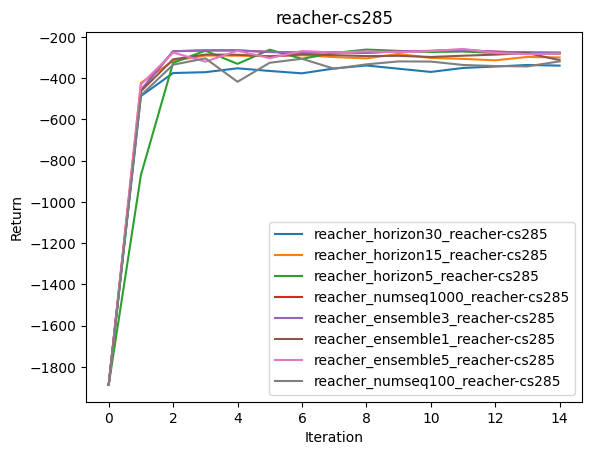

In [36]:
gen_plot("q4_")

## Q5:

```py
python cs285/scripts/run_hw3_actor_critic.py --env_name InvertedPendulum-v4 --ep_len 1000 --discount 0.95 -n 100 -l 2 -s 64 -b 5000 -lr 0.01 --exp_name q5_100_1 -ntu 100 -ngsptu 1
```
or
```py
python cs285/scripts/run_hw3_actor_critic.py --env_name InvertedPendulum-v4 --ep_len 1000 --discount 0.95 -n 100 -l 2 -s 64 -b 5000 -lr 0.01 --exp_name q5_10_10 -ntu 10 -ngsptu 10
```
    
```py
python cs285/scripts/run_hw3_actor_critic.py --env_name HalfCheetah-v4 --ep_len 150 --discount 0.90 --scalar_log_freq 1 -n 150 -l 2 -s 32 -b 30000 -eb 1500 -lr 0.02 --exp_name q5_100_1 -ntu 100 -ngsptu 1
```
or
```py
python cs285/scripts/run_hw3_actor_critic.py --env_name HalfCheetah-v4 --ep_len 150 --discount 0.90 --scalar_log_freq 1 -n 150 -l 2 -s 32 -b 30000 -eb 1500 -lr 0.02 --exp_name q5_10_10 -ntu 10 -ngsptu 10
```

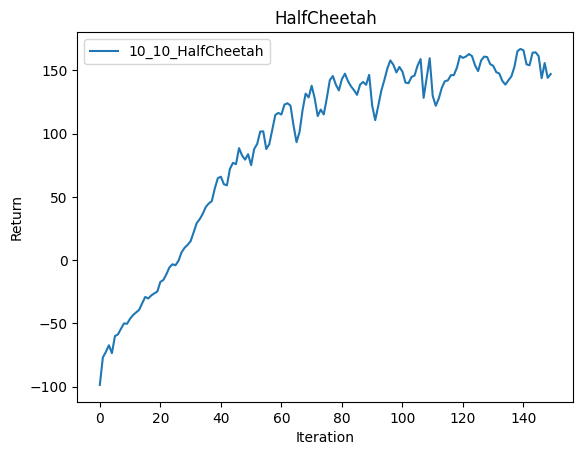

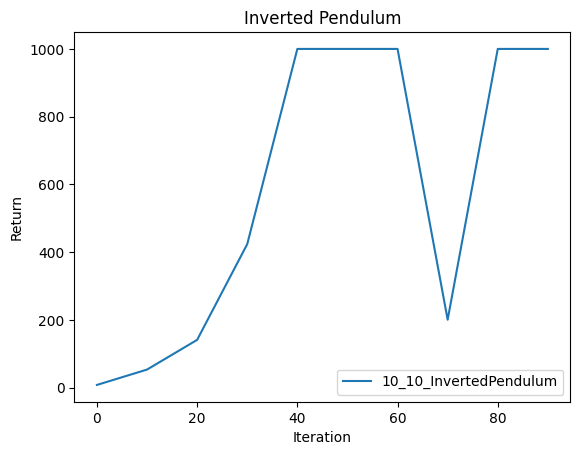

In [6]:
def gen_plot5(file_prefix, best=False, splice=None, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    ttl_final = ""
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Train_AverageReturn'))
        i = file[file.index("q") + 1]
        lbl1 = file.split(f"q{i}_")[1]
        lbl2 = lbl1.split("-v")[0]
        lbl = lbl2
        if splice:
            lbl = lbl[:lbl.index(splice)]
        
        if best:
            plt.plot(step_nums, np.array(vals), label="Average Per-Epoch Reward")
        else:
            plt.plot(step_nums, np.array(vals), label=lbl)
        
        if best:
            arg2 = "Train_BestReturn"
            times2, step_nums2, vals2 = zip(*event_acc.Scalars(arg2))
            plt.plot(step_nums2, np.array(vals2), label="best mean reward".title())

        plt.legend()
        ttl1 = file.split("-v")[0][1:].split("_")[-1].split(".")[0]
        ttl1 = rename.get(ttl1, ttl1)
        ttl2 = lbl
        ttl2 = rename.get(ttl2, ttl2)
        # print(ttl1, ttl2)
        if ttl1 != ttl2: ttl1 += f" ({ttl2})"
        if '(' in ttl1:
            ttl1 = ttl1[:ttl1.index('(')-1]
        plt.title(ttl1)
        plt.xlabel('Iteration')
        plt.ylabel('Return')
        plt.show()

gen_plot5("q5_")

## Q6:

```py
python cs285/scripts/run_hw3_sac.py \
    --env_name InvertedPendulum-v4 --ep_len 1000 \
    --discount 0.99 --scalar_log_freq 1000 \
    -n 100000 -l 2 -s 256 -b 1000 -eb 2000 \
    -lr 0.0003 --init_temperature 0.1 ----exp_name q6a_sac_InvertedPendulum \
    --seed 1

```

```py
python cs285/scripts/run_hw3_sac.py \
    --env_name HalfCheetah-v4 --ep_len 150 \
    --discount 0.99 --scalar_log_freq 1500 \
    -n 2000000 -l 2 -s 256 -b 1500 -eb 1500 \
    -lr 0.0003 --init_temperature 0.1 --exp_name q6b_sac_HalfCheetah_ \
    --seed 1

```

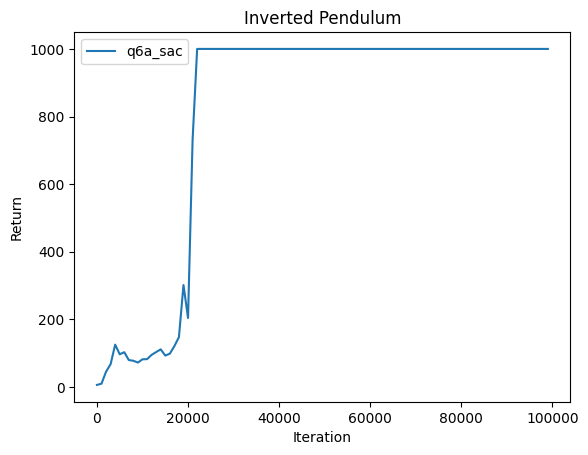

In [62]:
def gen_plot6(file_prefix, best=False, splice=None, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Train_AverageReturn'))
        i = int(file[file.index("q") + 1])
        lbl = file[i:].split("c_")[0] + 'c'
        lbl = lbl[5:]
        
        plt.plot(step_nums, np.array(vals), label=lbl)
        
        if best:
            arg2 = "Train_BestReturn"
            times2, step_nums2, vals2 = zip(*event_acc.Scalars(arg2))
            plt.plot(step_nums2, np.array(vals2), label="best mean reward".title())

        plt.legend()
        ttl1 = file.split("-v")[0][1:].split("_")[-1].split(".")[0]
        ttl1 = rename.get(ttl1, ttl1)
        ttl2 = lbl
        ttl2 = rename.get(ttl2, ttl2)
        # print(ttl1, ttl2)
        if ttl1 != ttl2: ttl1 += f" ({ttl2})"
        if '(' in ttl1:
            ttl1 = ttl1[:ttl1.index('(')-1]
    if best:
        plt.title(f"{ttl1} Performance")
    else:
        plt.title(ttl1)
    plt.xlabel('Iteration')
    plt.ylabel('Return')
    plt.show()

gen_plot6("q6a")

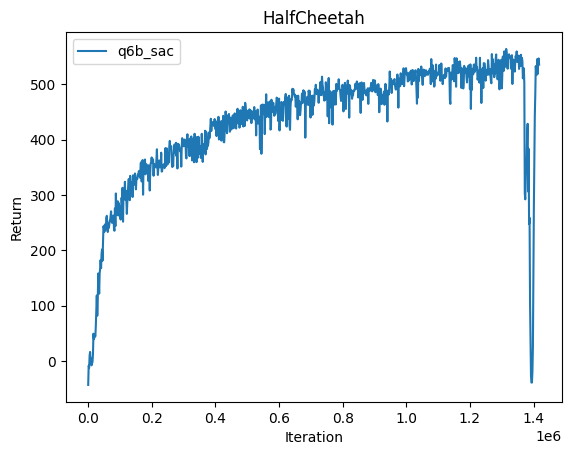

In [63]:
gen_plot6("q6b")